# Tarefa 02
Nesta tarefa vocês irão projetar duas arquiteturas de CNN utilizando os conceitos, camadas e técnicas vistas no curso. As redes serão treinadas no dataset CIFAR-10 e depois comparadas. As tarefas são:

**1) Definir as arquiteturas; ----> 0.3 pontos** 

- Quantas [camadas](https://keras.io/layers/core/) ela terá?
- Quais as operações utilizadas (convoluções, pooling, fully-connected)?
- Quais serão os parâmetros de cada camada (número e tamanho dos filtros convolucionais, stride, tamanho do pooling, funções de ativação)?
- Que tipo de [inicialização](https://keras.io/initializers/) de pesos você utilizará?
- Haverá dropout? Qual a taxa de dropout? 
- Haverá [regularização](https://keras.io/regularizers/)? Qual a taxa do regularizador?

**2) Definir como será o treino; ----> 0.25 pontos**
- Número de épocas e tamanho do batch (deixe igual p/ as duas redes);
- [Otimizador](https://keras.io/optimizers/);
- [Função de custo](https://keras.io/losses/);

**3) Classificar o conjunto de teste e comparar os resultados; ----> 0.25 pontos**
- Classificar imagens de teste;
- Comparar acurácias;
- Plotar loss pelo número de épocas no conjunto de treinamento e validação de cada rede. 
    
**4) Escrever um parágrafo com as suas conclusões; ----> 0.2 pontos**

-----

## CIFAR-10
Este conjunto de dados é composto de 60000 imagens coloridas de dimensões 32x32, divididas em 10 classes (com 6000 imagens por classe), sendo 50000 para treinamento e 10000 para teste. As classes do CIFAR-10 são **aviões, automóveis, pássaros, gatos, alces, cachorros, sapos, cavalos, navios, caminhões.**

O código abaixo carrega e transforma os dados de entrada para ficarem prontos para serem treinados/classificados pela sua rede. Os conjuntos de treino, validação e teste estão balanceados, portanto a acurácia já estará normalizada nos métodos do Keras.  

In [16]:
#Imports
import os
import numpy as np
from random import seed
seed(42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger

from keras.datasets import cifar10
from keras.utils import np_utils
#from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit


#Load data
(trainVal_data, trainVal_label), (X_test, y_test) = cifar10.load_data()

# Caso alguem tenha problemas com o StratifiedShuffleSplit, tente descomentar essa versao
#Split trainVal data into train and val sets (already balanced)
# splitIdx = StratifiedShuffleSplit(trainVal_label, 1, test_size=10000, random_state=0)
# for train_index, val_index in splitIdx:
#     X_train, X_val = trainVal_data[train_index], trainVal_data[val_index]
#     y_train, y_val = trainVal_label[train_index], trainVal_label[val_index]
    

splitIdx = StratifiedShuffleSplit(1, test_size=10000, random_state=0)
for train_index, val_index in splitIdx.split(trainVal_data, trainVal_label):
    X_train, X_val = trainVal_data[train_index], trainVal_data[val_index]
    y_train, y_val = trainVal_label[train_index], trainVal_label[val_index]

    
#Transform data
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)


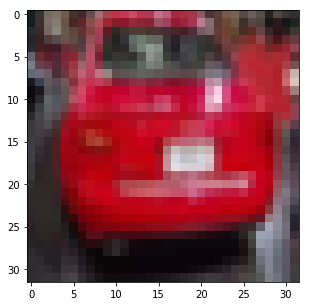

In [23]:
X_train.astype('float')
def plotImage(img):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)

    ax.imshow(np.uint8(img), interpolation='nearest')
    plt.show()
plotImage(array(X_train[222,:,:,:]))

In [6]:
from numpy import *
array(X_train[1,:,:,0],dtype=float)

array([[0.90980393, 0.9137255 , 0.92941177, ..., 0.66274512, 0.72156864,
        0.71764708],
       [0.87843138, 0.88235295, 0.89803922, ..., 0.59215689, 0.627451  ,
        0.627451  ],
       [0.74117649, 0.72156864, 0.78039217, ..., 0.59215689, 0.59215689,
        0.59215689],
       ...,
       [0.73333335, 0.68235296, 0.69803923, ..., 0.74509805, 0.71764708,
        0.70588237],
       [0.59607846, 0.53725493, 0.57647061, ..., 0.68235296, 0.65882355,
        0.68235296],
       [0.63137257, 0.53333336, 0.53725493, ..., 0.5529412 , 0.60784316,
        0.66274512]])

In [2]:
def reg_y(y):
    y_reg=[]
    for i in range(len(y)):
        y_reg.append(y[i][0])
    return y_reg
unique, counts = np.unique(y_train, return_counts=True)
print("Train ---> ", dict(zip(unique, counts)), "\n")

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(reg_y(y_train)), reg_y(y_train))
train_class_weights = dict(enumerate(class_weights))

unique, counts = np.unique(y_test, return_counts=True)
test_sample_per_class = counts

Train --->  {0: 4000, 1: 4000, 2: 4000, 3: 4000, 4: 4000, 5: 4000, 6: 4000, 7: 4000, 8: 4000, 9: 4000} 



--------
**A tarefa de vocês começa aqui!!!**

# Definir as duas arquiteturas - [0.3 pontos]
***Não se esqueçam de***:
    - Importar as camadas utilizadas e o tipo do modelo (Sequential);
    - Passar o input_shape na primeira camada da rede;
    - Utilizar ativação `softmax` na última camada densa da rede;

In [3]:
#Imports
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers # other stuff needed ... 

In [4]:
# Define 1st architecture
modelOne = Sequential()

modelOne.add(Conv2D(10, kernel_size=(5, 5),
activation='relu', #ReLU activation
input_shape=(32, 32, 3))) #no need to include the batch size

modelOne.add(MaxPooling2D(pool_size=(2, 2)))
modelOne.add(Flatten())
modelOne.add(Dropout(0.25))
modelOne.add(Dense(100, input_shape=(768,)))
modelOne.add(Activation('relu')) 

modelOne.add(Dense(10, activation='softmax'))

In [5]:
# Define 2nd architecture
modelTwo = Sequential()
#modelTwo.add(...)

# Treinamento - [0.25 pontos]
***Não se esqueçam de***:
    - Escolher otimizador e loss;
    - Compilar o modelo;
    - Definir número de épocas, tamanho do batch (utilizar o mesmo para ambas as redes);
    - Passar o conjunto de validação em `validation_data`;

In [6]:
#Compile first model
sgd = optimizers.SGD(lr=0.01) #lr = learning rate
modelOne.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#Train first CNN
modelOne.fit(X_train, Y_train,
          batch_size=128, epochs=3, verbose=1,
          class_weight = train_class_weights, 
          validation_data=(X_val, Y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 34s 858us/step - loss: 2.2019 - acc: 0.1775 - val_loss: 2.0102 - val_acc: 0.2966
Epoch 2/3
40000/40000 [==============================] - 34s 853us/step - loss: 1.9660 - acc: 0.2890 - val_loss: 1.8700 - val_acc: 0.3470
Epoch 3/3
40000/40000 [==============================] - 34s 844us/step - loss: 1.8457 - acc: 0.3402 - val_loss: 1.7742 - val_acc: 0.3724


In [ ]:
#Compile second model

#Train second CNN


# Resultados no conjunto de teste [0.25 pontos]
***Não se esqueçam de***:
    - Classificar as imagens do conjunto de teste utilizando cada rede;
    - Computar acurácia para cada rede;
    - Comparar ambas as acurácias;
    - Plotar loss pelo número de épocas no conjunto de treinamento e validação de cada rede. 

In [66]:
score = modelOne.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy (NOT NORMALIZED):', score[1])


predicted_classes = modelOne.predict_classes(X_test)
Y_test_classes = np.argmax(Y_test, axis=-1)

accPerClass = []
for classIdx in range(10):
    idx = (Y_test_classes == classIdx)
    
    correctPred = np.sum(predicted_classes[idx] == Y_test_classes[idx])
    accPerClass.append( correctPred / float(test_sample_per_class[classIdx]))
    
print(dict(zip(range(19),accPerClass)), "\n")
print("Normalized Acc --> ", np.mean(accPerClass))

10000/10000 [==============================] - 4s 397us/step
Test loss: 1.8510650749206543
Test accuracy (NOT NORMALIZED): 0.3523
{0: 0.549, 1: 0.4, 2: 0.116, 3: 0.107, 4: 0.133, 5: 0.439, 6: 0.57, 7: 0.36, 8: 0.392, 9: 0.457} 

Normalized Acc -->  0.3523


# Conclusões [0.2 pontos]
Escrevam um parágrafo com as conclusões que vocês tiraram na tarefa. Comentem as diferenças entre as duas arquiteturas e em seus treinamentos, apontando a motivação pelas decisões tomadas. Se o resultado ficou melhor/pior do que o que você esperava, o que você acha que pode ter acontecido?

In [10]:
# Write your paragraph here!